In [19]:
import re
import csv
import os
import glob
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

In [20]:
df_match = pd.read_csv("./match_data_yearly/all_years.csv",index_col=0)
df_match["Date"] = pd.to_datetime(df_match["Date"])
df_match

,Year,Sec,Date,Home,Away,HomeID,AwayID,HomeGF,AwayGF,W/L,Stadium,Attendances
ID,,,,,,,,,,,,
6010903,2006,1,2006-03-04,gamba-osaka,urawa-red-diamonds,9,3,1,1,0,万博,20916
6012807,2006,1,2006-03-05,ventforet-kofu,shimizu-s-pulse,28,7,0,2,2,小瀬,14277
6012231,2006,1,2006-03-05,fc-tokyo,oita-trinita,22,31,2,0,1,味スタ,22531
6011323,2006,1,2006-03-05,jubilo-iwata,avispa-fukuoka,13,23,1,1,0,静岡,28564
6010820,2006,1,2006-03-05,nagoya-grampus-eight,cerezo-osaka,8,20,3,2,1,瑞穂陸,17199
...,...,...,...,...,...,...,...,...,...,...,...,...
20340120,2020,34,2020-12-19,kashima-antlers,cerezo-osaka,1,20,1,1,0,カシマ,11251
20340810,2020,34,2020-12-19,nagoya-grampus-eight,sanfrecce-hiroshima,8,10,1,0,1,豊田ス,16825
20343331,2020,34,2020-12-19,sagan-tosu,oita-trinita,33,31,2,2,0,駅スタ,8966


In [21]:
df_rate_all = pd.DataFrame(index=df_match.index, columns=["Date","Sec","HomeRate","AwayRate","W/L"])
df_rate_all["W/L"] = df_match["W/L"]
df_rate_all["Sec"] = df_match["Sec"]
df_rate_all["Date"] = df_match["Date"]
df_rate_all

,Date,Sec,HomeRate,AwayRate,W/L
ID,,,,,
6010903,2006-03-04,1,NaN,NaN,0
6012807,2006-03-05,1,NaN,NaN,2
6012231,2006-03-05,1,NaN,NaN,1
6011323,2006-03-05,1,NaN,NaN,0
6010820,2006-03-05,1,NaN,NaN,1
...,...,...,...,...,...
20340120,2020-12-19,34,NaN,NaN,0
20340810,2020-12-19,34,NaN,NaN,1
20343331,2020-12-19,34,NaN,NaN,0


In [22]:
df_rate_csv = pd.read_csv("./rating/all_years.csv", index_col=0,parse_dates=True)
df_rate_csv

,kashima-antlers,urawa-red-diamonds,yokohama-fa-marinos,kawasaki-frontale,sanfrecce-hiroshima,vegalta-sendai,kashiwa-reysol,fc-tokyo,sagan-tosu,gamba-osaka,...,omiya-ardija,avispa-fukuoka,matsumoto-yamaga,oita-trinita,jef-united,tokyo-verdy,kyoto-sanga,tokushima-vortis,yokohama-fc,montedio-yamagata
2006-03-04,1500,1500,1500,1500,1500,1350,1350,1500,1350,1500,...,1500,1500,1350,1500,1500,1350,1500,1350,1350,1350
2006-03-05,1500,1500,1500,1500,1500,1350,1350,1500,1350,1500,...,1500,1500,1350,1500,1500,1350,1500,1350,1350,1350
2006-03-06,1508,1500,1508,1508,1492,1350,1350,1508,1350,1500,...,1508,1500,1350,1492,1492,1350,1492,1350,1350,1350
2006-03-07,1508,1500,1508,1508,1492,1350,1350,1508,1350,1500,...,1508,1500,1350,1492,1492,1350,1492,1350,1350,1350
2006-03-08,1508,1500,1508,1508,1492,1350,1351,1508,1350,1500,...,1508,1500,1350,1492,1492,1350,1492,1350,1351,1350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-16,1595,1490,1543,1678,1535,1411,1478,1541,1444,1577,...,1420,1331,1424,1473,1410,1408,1362,1313,1406,1372
2020-12-17,1595,1486,1543,1682,1526,1419,1487,1541,1455,1582,...,1420,1331,1424,1480,1410,1408,1362,1313,1402,1372
2020-12-18,1595,1486,1543,1682,1526,1419,1487,1541,1455,1582,...,1420,1331,1424,1480,1410,1408,1362,1313,1402,1372
2020-12-19,1595,1486,1543,1682,1526,1419,1487,1541,1455,1582,...,1420,1331,1424,1480,1410,1408,1362,1313,1402,1372


In [23]:
df_rate_csv.index

DatetimeIndex(['2006-03-04', '2006-03-05', '2006-03-06', '2006-03-07',
               '2006-03-08', '2006-03-09', '2006-03-10', '2006-03-11',
               '2006-03-12', '2006-03-13',
               ...
               '2020-12-11', '2020-12-12', '2020-12-13', '2020-12-14',
               '2020-12-15', '2020-12-16', '2020-12-17', '2020-12-18',
               '2020-12-19', '2020-12-20'],
              dtype='datetime64[ns]', length=4157, freq=None)

In [24]:
df_rate_csv.columns

Index(['kashima-antlers', 'urawa-red-diamonds', 'yokohama-fa-marinos',
       'kawasaki-frontale', 'sanfrecce-hiroshima', 'vegalta-sendai',
       'kashiwa-reysol', 'fc-tokyo', 'sagan-tosu', 'gamba-osaka',
       'vissel-kobe', 'jubilo-iwata', 'consadole-sapporo', 'shimizu-s-pulse',
       'cerezo-osaka', 'shonan-bellmare', 'v-varen-nagasaki',
       'nagoya-grampus-eight', 'albirex-niigata', 'ventforet-kofu',
       'omiya-ardija', 'avispa-fukuoka', 'matsumoto-yamaga', 'oita-trinita',
       'jef-united', 'tokyo-verdy', 'kyoto-sanga', 'tokushima-vortis',
       'yokohama-fc', 'montedio-yamagata'],
      dtype='object')

<AxesSubplot:>

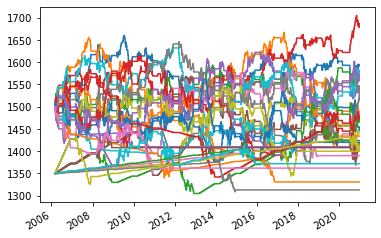

In [25]:
df_rate_csv.plot(figsize=(6,4),legend=False)

In [26]:
for index,row in df_match.iterrows():
    home_rate = df_rate_csv.loc[row["Date"], row["Home"]]
    away_rate = df_rate_csv.loc[row["Date"], row["Away"]]
    
    df_rate_all.at[index,"HomeRate"] = home_rate
    df_rate_all.at[index,"AwayRate"] = away_rate    

In [27]:
df_rate_all["RateDiff"] = df_rate_all["HomeRate"] - df_rate_all["AwayRate"]

In [28]:
df_rate_all

,Date,Sec,HomeRate,AwayRate,W/L,RateDiff
ID,,,,,,
6010903,2006-03-04,1,1500,1500,0,0
6012807,2006-03-05,1,1500,1500,2,0
6012231,2006-03-05,1,1500,1500,1,0
6011323,2006-03-05,1,1500,1500,0,0
6010820,2006-03-05,1,1500,1500,1,0
...,...,...,...,...,...,...
20340120,2020-12-19,34,1595,1559,0,36
20340810,2020-12-19,34,1514,1526,1,-12
20343331,2020-12-19,34,1455,1480,0,-25


In [29]:
df_rate_0614 = df_rate_all[df_rate_all["Date"].dt.year < 2015]
df_rate_0614

,Date,Sec,HomeRate,AwayRate,W/L,RateDiff
ID,,,,,,
6010903,2006-03-04,1,1500,1500,0,0
6012807,2006-03-05,1,1500,1500,2,0
6012231,2006-03-05,1,1500,1500,1,0
6011323,2006-03-05,1,1500,1500,0,0
6010820,2006-03-05,1,1500,1500,1,0
...,...,...,...,...,...,...
14342205,2014-12-06,34,1509,1553,0,-44
14340308,2014-12-06,34,1573,1521,2,52
14343609,2014-12-06,34,1309,1516,0,-207


### レーティングと勝敗結果の関係性

In [30]:
hist2, bins = np.histogram(df_rate_0614[df_rate_0614["W/L"] == 2]["RateDiff"], range=(-310,310),bins=31)


In [31]:
hist1,bins =np.histogram(df_rate_0614[df_rate_0614["W/L"] == 1]["RateDiff"], range=(-310,310),bins=31)

In [32]:
hist0,bins = np.histogram(df_rate_0614[df_rate_0614["W/L"] == 0]["RateDiff"], range=(-310,310),bins=31)


In [33]:
df_hist = pd.DataFrame(index=[ int(b+10) for b in bins][:-1])
df_hist[1] = hist1
df_hist[0] = hist0
df_hist[2] = hist2

df_hist

,1,0,2
-300,2,0,0
-280,0,0,1
-260,1,0,2
-240,2,2,3
-220,1,2,9
-200,3,5,15
-180,10,7,12
-160,7,14,28
-140,21,11,33
-120,33,28,44


In [34]:
cross = pd.DataFrame(columns=[1,0,2])

In [35]:
for index,row in df_hist.iterrows():
    cross.loc[index] = (row/sum(row))

In [36]:
cross

,1,0,2
-300,1.000000,0.000000,0.000000
-280,0.000000,0.000000,1.000000
-260,0.333333,0.000000,0.666667
-240,0.285714,0.285714,0.428571
-220,0.083333,0.166667,0.750000
-200,0.130435,0.217391,0.652174
-180,0.344828,0.241379,0.413793
-160,0.142857,0.285714,0.571429
-140,0.323077,0.169231,0.507692
-120,0.314286,0.266667,0.419048


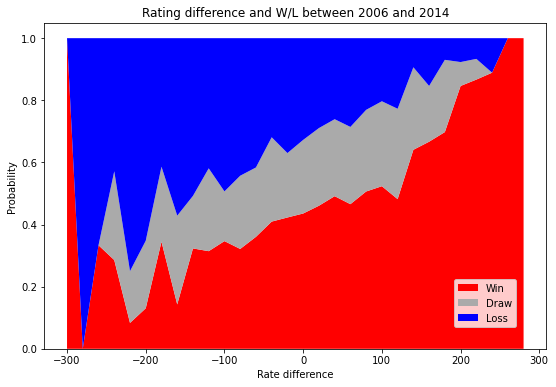

In [37]:
fig, ax = plt.subplots(figsize=(9,6))
ax.stackplot(cross.index,cross[1],cross[0],cross[2],labels=["Win","Draw","Loss"],colors=["#f00","#aaa","#00f"])
ax.legend(loc='lower right', bbox_to_anchor=(0.95, 0.05))
ax.set_xlabel("Rate difference")
ax.set_ylabel("Probability")
plt.title("Rating difference and W/L between 2006 and 2014")
plt.show()

In [38]:
np.histogram(df_rate_0614["RateDiff"], range=(-100,100),bins=20)

(array([ 79,  67,  73,  84, 113, 114,  96, 128, 118, 122, 165, 118, 110,
        127, 103, 110,  79,  81,  75,  70]),
 array([-100.0, -90.0, -80.0, -70.0, -60.0, -50.0, -40.0, -30.0, -20.0,
        -10.0, 0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0,
        100.0], dtype=object))

In [39]:
122+165+118+118

523

In [40]:
523/2754

0.18990559186637618

レート差±20が全体の19.0%を占める

### 実際に予測してみる

In [41]:
df_rate_1520 = df_rate_all[df_rate_all["Date"].dt.year >= 2015]
df_rate_1520

,Date,Sec,HomeRate,AwayRate,W/L,RateDiff
ID,,,,,,
15010846,2015-03-07,1,1531,1404,0,127
15010922,2015-03-07,1,1512,1510,0,2
15011028,2015-03-07,1,1550,1472,1,78
15013378,2015-03-07,1,1533,1495,1,38
15015429,2015-03-07,1,1482,1404,1,78
...,...,...,...,...,...,...
20340120,2020-12-19,34,1595,1559,0,36
20340810,2020-12-19,34,1514,1526,1,-12
20343331,2020-12-19,34,1455,1480,0,-25


In [42]:
df_rate_1520["W/L"].value_counts()

1    735
2    674
0    427
Name: W/L, dtype: int64

In [43]:
df_rate_1520_pred = df_rate_1520.assign(Prediction=np.nan)
df_rate_1520_pred

,Date,Sec,HomeRate,AwayRate,W/L,RateDiff,Prediction
ID,,,,,,,
15010846,2015-03-07,1,1531,1404,0,127,NaN
15010922,2015-03-07,1,1512,1510,0,2,NaN
15011028,2015-03-07,1,1550,1472,1,78,NaN
15013378,2015-03-07,1,1533,1495,1,38,NaN
15015429,2015-03-07,1,1482,1404,1,78,NaN
...,...,...,...,...,...,...,...
20340120,2020-12-19,34,1595,1559,0,36,NaN
20340810,2020-12-19,34,1514,1526,1,-12,NaN
20343331,2020-12-19,34,1455,1480,0,-25,NaN


In [44]:
for index,row in df_rate_1520_pred.iterrows():
    if row["RateDiff"] > 0:
        pred = 1
    elif row["RateDiff"] < 0:
        pred = 2
    else:
        pred = 0
    df_rate_1520_pred.at[index,"Prediction"] = pred
    
df_rate_1520_pred["Prediction"] = df_rate_1520_pred["Prediction"].astype(int)

In [45]:
df_rate_1520_pred["Prediction"].value_counts()

1    921
2    905
0     10
Name: Prediction, dtype: int64

In [46]:
df_rate_1520_pred[df_rate_1520_pred["W/L"] == df_rate_1520_pred["Prediction"]]["Prediction"].value_counts()

1    454
2    411
0      2
Name: Prediction, dtype: int64

In [47]:
df_rate_1520_pred[df_rate_1520_pred["W/L"] == df_rate_1520_pred["Prediction"]]["Prediction"].value_counts()/df_rate_1520_pred["W/L"].value_counts()

1    0.617687
2    0.609792
0    0.004684
dtype: float64

In [48]:
len(df_rate_1520_pred[df_rate_1520_pred["W/L"] == df_rate_1520_pred["Prediction"]])/len(df_rate_1520_pred)

0.4722222222222222

In [49]:
accuracy_by_sec = df_rate_1520_pred[df_rate_1520_pred["W/L"] == df_rate_1520_pred["Prediction"]]["Sec"].value_counts().sort_index() / df_rate_1520_pred["Sec"].value_counts().sort_index()




In [50]:
x = accuracy_by_sec.index
y = np.poly1d(np.polyfit(accuracy_by_sec.index, accuracy_by_sec.values, 2))(accuracy_by_sec.index)

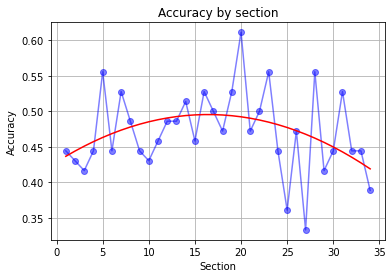

In [51]:
plt.plot(x, accuracy_by_sec.values, c="blue",marker="o",alpha=0.5)
plt.plot(x, y, c="red")
plt.title("Accuracy by section")
plt.xlabel("Section")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

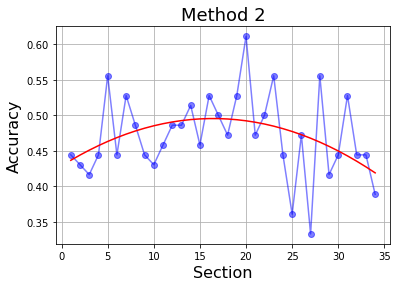

In [52]:
## 予稿用
plt.plot(x, accuracy_by_sec.values, c="blue",marker="o",alpha=0.5)
plt.plot(x, y, c="red")
plt.title("Method 2",fontsize=18)
plt.xlabel("Section", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.grid(True)
plt.show()

### ±20を引き分けとみなす

In [53]:
df_rate_1520_pred = df_rate_1520_pred.assign(Prediction2=np.nan)
df_rate_1520_pred

,Date,Sec,HomeRate,AwayRate,W/L,RateDiff,Prediction,Prediction2
ID,,,,,,,,
15010846,2015-03-07,1,1531,1404,0,127,1,NaN
15010922,2015-03-07,1,1512,1510,0,2,1,NaN
15011028,2015-03-07,1,1550,1472,1,78,1,NaN
15013378,2015-03-07,1,1533,1495,1,38,1,NaN
15015429,2015-03-07,1,1482,1404,1,78,1,NaN
...,...,...,...,...,...,...,...,...
20340120,2020-12-19,34,1595,1559,0,36,1,NaN
20340810,2020-12-19,34,1514,1526,1,-12,2,NaN
20343331,2020-12-19,34,1455,1480,0,-25,2,NaN


In [54]:
for index,row in df_rate_1520_pred.iterrows():
    if row["RateDiff"] > 20:
        pred = 1
    elif row["RateDiff"] < -20:
        pred = 2
    else:
        pred = 0
    df_rate_1520_pred.at[index,"Prediction2"] = pred
    
df_rate_1520_pred["Prediction2"] = df_rate_1520_pred["Prediction2"].astype(int)

In [55]:
df_rate_1520_pred

,Date,Sec,HomeRate,AwayRate,W/L,RateDiff,Prediction,Prediction2
ID,,,,,,,,
15010846,2015-03-07,1,1531,1404,0,127,1,1
15010922,2015-03-07,1,1512,1510,0,2,1,0
15011028,2015-03-07,1,1550,1472,1,78,1,1
15013378,2015-03-07,1,1533,1495,1,38,1,1
15015429,2015-03-07,1,1482,1404,1,78,1,1
...,...,...,...,...,...,...,...,...
20340120,2020-12-19,34,1595,1559,0,36,1,1
20340810,2020-12-19,34,1514,1526,1,-12,2,0
20343331,2020-12-19,34,1455,1480,0,-25,2,2


In [56]:
df_rate_1520_pred["Prediction2"].value_counts()

1    776
2    757
0    303
Name: Prediction2, dtype: int64

In [57]:
df_rate_1520_pred[df_rate_1520_pred["W/L"]==df_rate_1520_pred["Prediction2"]]["Prediction2"].value_counts()

1    403
2    359
0     75
Name: Prediction2, dtype: int64

In [58]:
df_rate_1520_pred[df_rate_1520_pred["W/L"]==df_rate_1520_pred["Prediction2"]]["Prediction2"].value_counts()/df_rate_1520_pred["W/L"].value_counts()



1    0.548299
2    0.532641
0    0.175644
dtype: float64

In [59]:
len(df_rate_1520_pred[df_rate_1520_pred["W/L"] == df_rate_1520_pred["Prediction2"]])/len(df_rate_1520_pred)

0.45588235294117646

In [60]:
len(df_rate_1520_pred[df_rate_1520_pred["W/L"] == df_rate_1520_pred["Prediction2"]])

837

In [61]:
accuracy_by_sec = df_rate_1520_pred[df_rate_1520_pred["W/L"] == df_rate_1520_pred["Prediction2"]]["Sec"].value_counts().sort_index() / df_rate_1520_pred["Sec"].value_counts().sort_index()



In [62]:
x = accuracy_by_sec.index
y = np.poly1d(np.polyfit(accuracy_by_sec.index, accuracy_by_sec.values, 2))(accuracy_by_sec.index)

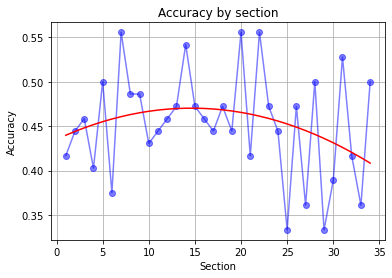

In [63]:
plt.plot(x, accuracy_by_sec.values, c="blue", marker="o",alpha=0.5)
plt.plot(x, y, c="red")
plt.title("Accuracy by section")
plt.xlabel("Section")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

### イロレーティングを勝率換算して,Loglossを算出する

06-14年のレート差と勝敗関係からほぼどのレート差においても一定の引き分け試合が存在している.そこで06-14年の引き分け試合の割合が23.6%であることから,全試合に23.6%の確率があるとみなし,15-20年の勝率を換算する

In [64]:
df_rate_1520_pred

,Date,Sec,HomeRate,AwayRate,W/L,RateDiff,Prediction,Prediction2
ID,,,,,,,,
15010846,2015-03-07,1,1531,1404,0,127,1,1
15010922,2015-03-07,1,1512,1510,0,2,1,0
15011028,2015-03-07,1,1550,1472,1,78,1,1
15013378,2015-03-07,1,1533,1495,1,38,1,1
15015429,2015-03-07,1,1482,1404,1,78,1,1
...,...,...,...,...,...,...,...,...
20340120,2020-12-19,34,1595,1559,0,36,1,1
20340810,2020-12-19,34,1514,1526,1,-12,2,0
20343331,2020-12-19,34,1455,1480,0,-25,2,2


In [65]:
df_rate_1520_pred.insert(8,"WinProba", np.nan)
df_rate_1520_pred.insert(9,"DrawProba", np.nan)
df_rate_1520_pred.insert(10,"LossProba", np.nan)

In [66]:
df_rate_1520_pred

,Date,Sec,HomeRate,AwayRate,W/L,RateDiff,Prediction,Prediction2,WinProba,DrawProba,LossProba
ID,,,,,,,,,,,
15010846,2015-03-07,1,1531,1404,0,127,1,1,NaN,NaN,NaN
15010922,2015-03-07,1,1512,1510,0,2,1,0,NaN,NaN,NaN
15011028,2015-03-07,1,1550,1472,1,78,1,1,NaN,NaN,NaN
15013378,2015-03-07,1,1533,1495,1,38,1,1,NaN,NaN,NaN
15015429,2015-03-07,1,1482,1404,1,78,1,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
20340120,2020-12-19,34,1595,1559,0,36,1,1,NaN,NaN,NaN
20340810,2020-12-19,34,1514,1526,1,-12,2,0,NaN,NaN,NaN
20343331,2020-12-19,34,1455,1480,0,-25,2,2,NaN,NaN,NaN


In [67]:
for index,row in df_rate_1520_pred.iterrows():
    
    win_proba = 1 /(1+pow(10, row["RateDiff"]*(-1)/400) )*0.764
    loss_proba = 1/ (1+pow(10, row["RateDiff"]/400) )*0.764
    draw_proba = 0.236
    
    df_rate_1520_pred.at[index,"WinProba"] = win_proba
    df_rate_1520_pred.at[index,"LossProba"] = loss_proba
    df_rate_1520_pred.at[index,"DrawProba"] = draw_proba

In [68]:
df_rate_1520_pred

,Date,Sec,HomeRate,AwayRate,W/L,RateDiff,Prediction,Prediction2,WinProba,DrawProba,LossProba
ID,,,,,,,,,,,
15010846,2015-03-07,1,1531,1404,0,127,1,1,0.515731,0.236,0.248269
15010922,2015-03-07,1,1512,1510,0,2,1,0,0.384199,0.236,0.379801
15011028,2015-03-07,1,1550,1472,1,78,1,1,0.466347,0.236,0.297653
15013378,2015-03-07,1,1533,1495,1,38,1,1,0.423615,0.236,0.340385
15015429,2015-03-07,1,1482,1404,1,78,1,1,0.466347,0.236,0.297653
...,...,...,...,...,...,...,...,...,...,...,...
20340120,2020-12-19,34,1595,1559,0,36,1,1,0.421440,0.236,0.342560
20340810,2020-12-19,34,1514,1526,1,-12,2,0,0.368811,0.236,0.395189
20343331,2020-12-19,34,1455,1480,0,-25,2,2,0.354560,0.236,0.409440


In [69]:
log_loss(df_rate_1520_pred["W/L"],df_rate_1520_pred[["DrawProba","WinProba","LossProba"]],labels=[0,1,2])

1.0398917113267738